In [182]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [142]:
df_overseas = pd.read_csv('./DATA/overseas-trade-index-march-2019-quarter-provisional-csv.csv')
df_overseas.drop(['MAGNTUDE', 'Series_title_3', 'Series_title_4', 'Series_title_5'], inplace=True, axis=1)

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [144]:
df_overseas['date_col'] = df_overseas['Period'].astype(str).str.split('.')

In [159]:
df_overseas['year'] = [x[0] for x in df_overseas['date_col']]
df_overseas['year'] = pd.to_numeric(df_overseas['year'])

In [158]:
df_overseas['month'] = [x[1] for x in df_overseas['date_col']]
df_overseas['month'] = pd.to_numeric(df_overseas['month'])

In [161]:
df_overseas.drop(columns=['Period', 'date_col'], inplace=True, axis=1)

In [165]:
df_overseas.UNITS.unique()

array(['Index', 'Dollars', 'Percent', 'index'], dtype=object)

In [166]:
df_dollars = df_overseas[df_overseas['UNITS'] == "Dollars"] # Get all Dollar Statements

In [169]:
df_percent = df_overseas[df_overseas['UNITS'] == "Percent"]# Get all Percent Statements

## Get all statements that were imported and have the $ value attached

In [218]:
df_total_imports_dollars = df_dollars[(df_dollars['Series_title_2'] == 'Total Imports') | 
                                     (df_dollars['Series_title_2'] == 'TOTAL IMPORTS')]

In [190]:
df_total_imp_exp_percent = df_percent[(df_percent['Series_title_2'] == 'TOTAL IMPORTS') | (df_percent['Series_title_2'] == 'TOTAL EXPORTS')]

#### Total Imports

The total imports in NZ had a steady growth from 1990 to 1996, and then there was a big bump up in 97, and the trend continued from there.

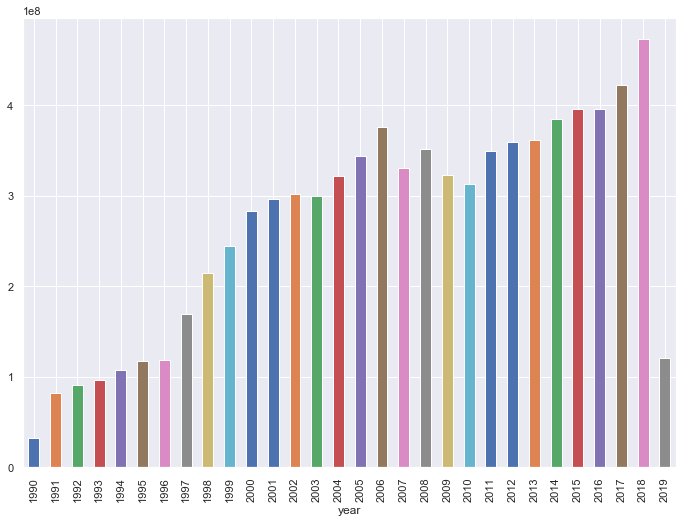

In [221]:
df_total_imports_dollars.groupby('year')['Data_value'].sum().plot.bar()

In [222]:
df_total_exports_dollars = df_dollars[(df_dollars['Series_title_2'] == 'Total Exports') | 
                                     (df_dollars['Series_title_2'] == 'TOTAL EXPORTS')]

In [200]:
df_max_type_sold = df_dollars.copy()

In [214]:
df_max_type_sold = df_max_type_sold[~(df_max_type_sold["Series_title_2"].str.contains("TOTAL")) & 
                                   ~(df_max_type_sold["Series_title_2"].str.contains("total"))]

In [235]:
df_countries_exports = df_dollars[(df_dollars["Series_title_2"].str.contains("Exports to"))]

In [247]:
# Remove outliers, get the last 95th Percentile
q = df_countries_exports["Data_value"].quantile(0.95)
df_countries_exports = df_countries_exports[df_countries_exports["Data_value"] < q]

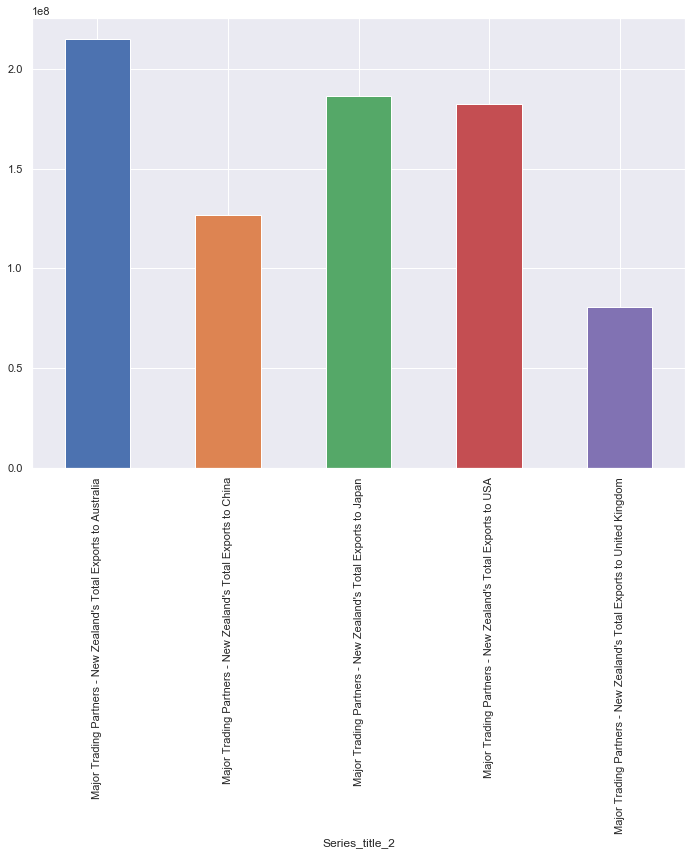

In [249]:
df_countries_exports.groupby("Series_title_2")["Data_value"].sum().plot.bar()

In [267]:
def get_sum(df, **kws):
    return df.groupby('year')['Data_value'].sum()

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


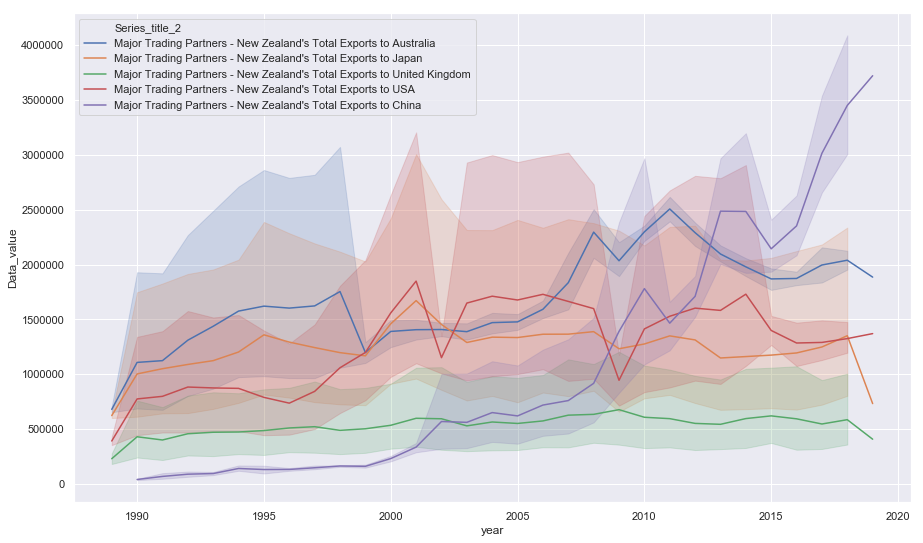

In [272]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.lineplot(x='year', y='Data_value', data=df_countries_exports, hue='Series_title_2')
plt.show()

In [250]:
df_countries_imports = df_dollars[(df_dollars["Series_title_2"].str.contains("Imports from"))]

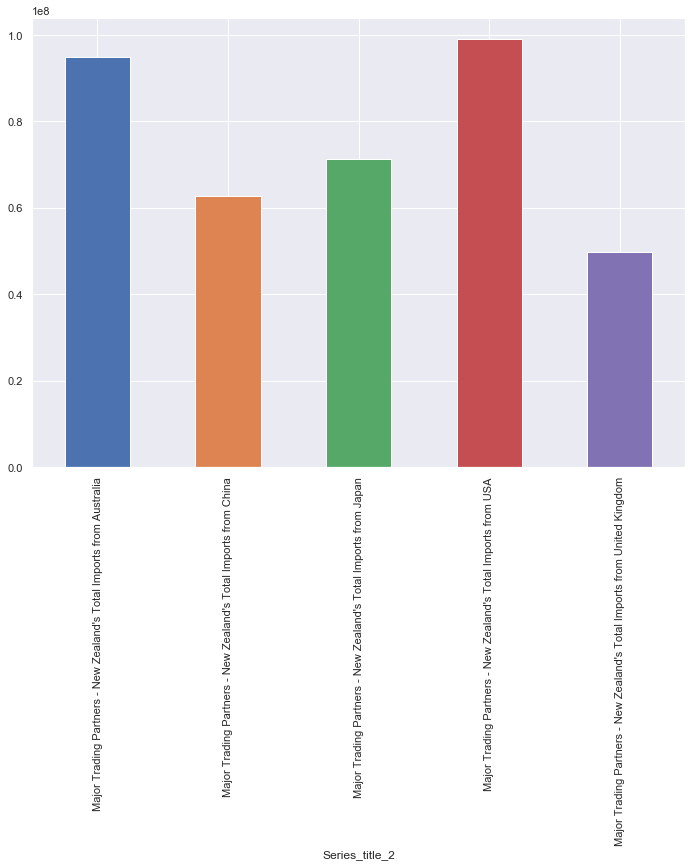

In [258]:
q = df_countries_imports["Data_value"].quantile(0.95)
df_countries_imports = df_countries_imports[df_countries_imports["Data_value"] < q]
df_countries_imports.groupby("Series_title_2")["Data_value"].sum().plot.bar()

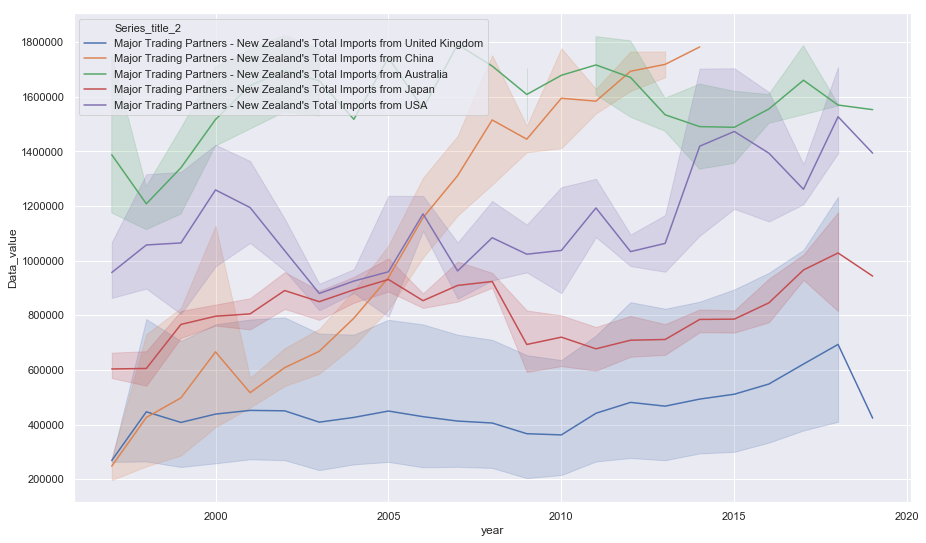

In [273]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.lineplot(x='year', y='Data_value', data=df_countries_imports, hue='Series_title_2')
plt.show()